<a href="https://colab.research.google.com/github/pavelshev03/skillbox/blob/master/Data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
x=2
y=3
x+y

5

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
path = 'https://github.com/pavelshev03/skilllearn/blob/master/%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3_5%D0%BB%D0%B5%D1%82.xls?raw=true'

data = pd.read_excel(path, skiprows=6)

In [59]:
data  # типа данных - data frame

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,10.09.2020 12:00,13.5,742.0,742.4,-0.3,79.0,"Ветер, дующий с западо-юго-запада",5.0,11.0,13.0,100%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,Кучевые средние или мощные или вместе с кучевы...,70 – 80%.,600-1000,"Высококучевые просвечивающие, полосами, либо о...",NaN,10.0,9.8,NaN,NaN,NaN,NaN,NaN,NaN
1,10.09.2020 09:00,15.4,742.3,742.6,-1.5,76.0,"Ветер, дующий с юго-запада",6.0,12.0,13.0,"90 или более, но не 100%",Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,13.0,NaN,"Слоисто-кучевые, образовавшиеся из кучевых.",60%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,11.1,6,12.0,Поверхность почвы влажная.,12.0,NaN,NaN
2,10.09.2020 06:00,14.8,743.8,744.1,-2.5,89.0,"Ветер, дующий с юго-юго-запада",3.0,NaN,NaN,60%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,13.0,NaN,Кучевые и слоисто-кучевые (но не слоисто-кучев...,50%.,1000-1500,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,13.0,6,12.0,NaN,NaN,NaN,NaN
3,10.09.2020 03:00,13.6,746.3,746.7,-4.1,95.0,"Ветер, дующий с юга",3.0,NaN,NaN,100%.,Ливневый(ые) дождь(и).,Ливень (ливни).,Дождь.,NaN,NaN,"Кучево-дождевые лысые с кучевыми, слоисто-куче...",100%.,300-600,NaN,NaN,10.0,12.8,NaN,NaN,NaN,NaN,NaN,NaN
4,10.09.2020 00:00,13.8,750.4,750.7,-3.0,84.0,"Ветер, дующий с юга",3.0,NaN,NaN,"90 или более, но не 100%",Состояние неба в общем не изменилось.,Дождь.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",20–30%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,11.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14607,10.09.2015 12:00,15.9,770.5,771.1,0.5,73.0,"Ветер, дующий с западо-юго-запада",2.0,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",70 – 80%.,"2500 или более, или облаков нет.",Клочья (часто чечевицеобразные) высококучевых ...,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,11.1,NaN,NaN,NaN,NaN,NaN,NaN
14608,10.09.2015 09:00,12.7,770.0,770.6,0.3,87.0,"Ветер, дующий с запада",1.0,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,8.1,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...","90 или более, но не 100%","2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,10.6,Осадков нет,12.0,NaN,NaN,NaN,NaN
14609,10.09.2015 06:00,9.6,769.7,770.3,0.5,87.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,,NaN,NaN,8.1,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, полосами, либо о...",NaN,10.0,7.5,Осадков нет,12.0,NaN,NaN,NaN,NaN
14610,10.09.2015 03:00,8.6,769.2,769.8,0.5,90.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перисто-слоистые, покрывающие все небо.",10.0,7.1,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
data.columns


Index(['Местное время в Санкт-Петербурге', 'T', 'Po', 'P', 'Pa', 'U', 'DD',
       'Ff', 'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H',
       'Cm', 'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss'],
      dtype='object')

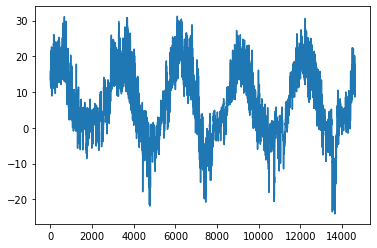

In [61]:
x = data.index
y = data['T']

plt.plot(x, y)

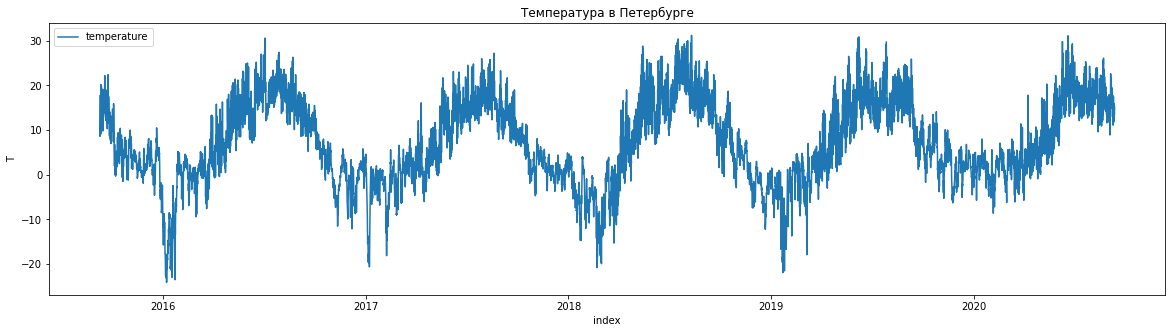

In [71]:
plt.figure(figsize=(20, 5))
plt.plot(x, y, label='temperature')
plt.title('Температура в Петербурге')
plt.xlabel('index')
plt.ylabel('T')
plt.legend()

In [72]:
data['Местное время в Санкт-Петербурге']

0        10.09.2015 00:00
1        10.09.2015 03:00
2        10.09.2015 06:00
3        10.09.2015 09:00
4        10.09.2015 12:00
               ...       
14607    10.09.2020 00:00
14608    10.09.2020 03:00
14609    10.09.2020 06:00
14610    10.09.2020 09:00
14611    10.09.2020 12:00
Name: Местное время в Санкт-Петербурге, Length: 14612, dtype: object

In [73]:
data['Местное время в Санкт-Петербурге'][0]

data['date'] = pd.to_datetime(data['Местное время в Санкт-Петербурге'])

In [74]:
data['date'][0]  # С этим типом данных уже можно работать


Timestamp('2015-10-09 00:00:00')

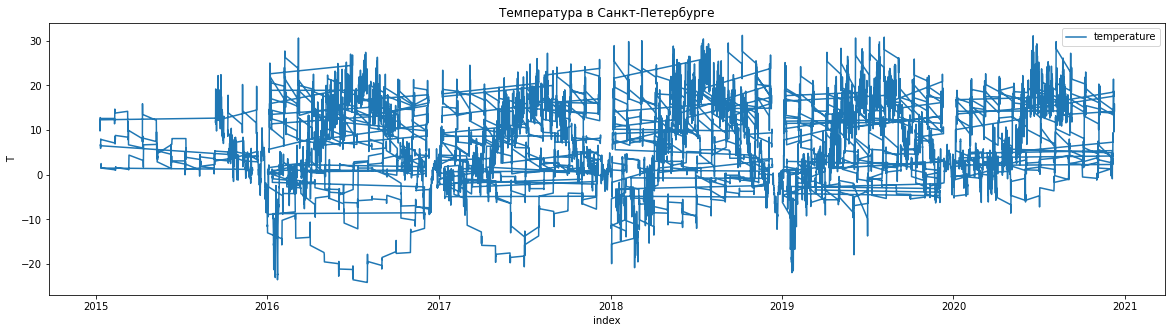

In [75]:
x = data['date']
y = data['T']

plt.figure(figsize=(20, 5))
plt.plot(x, y, label='temperature')
plt.title('Температура в Санкт-Петербурге')
plt.xlabel('index')
plt.ylabel('T')
plt.legend()

In [76]:
# 2 беды:
# данные задом наперед - сначала 2015, потом 2020
# по умолчанию pandas пытается считать американский формат

# Фиксим российский формат дат на американский
data['date2'] = pd.to_datetime(data['Местное время в Санкт-Петербурге'], dayfirst=True)

In [77]:
# Отсортировали данные по дате в правильном порядке
data = data.sort_values('date2')
data

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,date2
0,10.09.2015 00:00,10.0,768.7,769.3,0.6,83.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перисто-слоистые, покрывающие все небо.",10.0,7.3,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-09 00:00:00,2015-09-10 00:00:00
1,10.09.2015 03:00,8.6,769.2,769.8,0.5,90.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перисто-слоистые, покрывающие все небо.",10.0,7.1,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-09 03:00:00,2015-09-10 03:00:00
2,10.09.2015 06:00,9.6,769.7,770.3,0.5,87.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,,NaN,NaN,8.1,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, полосами, либо о...",NaN,10.0,7.5,Осадков нет,12.0,NaN,NaN,NaN,NaN,2015-10-09 06:00:00,2015-09-10 06:00:00
3,10.09.2015 09:00,12.7,770.0,770.6,0.3,87.0,"Ветер, дующий с запада",1.0,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,8.1,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...","90 или более, но не 100%","2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,10.6,Осадков нет,12.0,NaN,NaN,NaN,NaN,2015-10-09 09:00:00,2015-09-10 09:00:00
4,10.09.2015 12:00,15.9,770.5,771.1,0.5,73.0,"Ветер, дующий с западо-юго-запада",2.0,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",70 – 80%.,"2500 или более, или облаков нет.",Клочья (часто чечевицеобразные) высококучевых ...,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,11.1,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-09 12:00:00,2015-09-10 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14607,10.09.2020 00:00,13.8,750.4,750.7,-3.0,84.0,"Ветер, дующий с юга",3.0,NaN,NaN,"90 или более, но не 100%",Состояние неба в общем не изменилось.,Дождь.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",20–30%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,11.1,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-09 00:00:00,2020-09-10 00:00:00
14608,10.09.2020 03:00,13.6,746.3,746.7,-4.1,95.0,"Ветер, дующий с юга",3.0,NaN,NaN,100%.,Ливневый(ые) дождь(и).,Ливень (ливни).,Дождь.,NaN,NaN,"Кучево-дождевые лысые с кучевыми, слоисто-куче...",100%.,300-600,NaN,NaN,10.0,12.8,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-09 03:00:00,2020-09-10 03:00:00
14609,10.09.2020 06:00,14.8,743.8,744.1,-2.5,89.0,"Ветер, дующий с юго-юго-запада",3.0,NaN,NaN,60%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,13.0,NaN,Кучевые и слоисто-кучевые (но не слоисто-кучев...,50%.,1000-1500,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,13.0,6,12.0,NaN,NaN,NaN,NaN,2020-10-09 06:00:00,2020-09-10 06:00:00
14610,10.09.2020 09:00,15.4,742.3,742.6,-1.5,76.0,"Ветер, дующий с юго-запада",6.0,12.0,13.0,"90 или более, но не 100%",Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,13.0,NaN,"Слоисто-кучевые, образовавшиеся из кучевых.",60%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,11.1,6,12.0,Поверхность почвы влажная.,12.0,NaN,NaN,2020-10-09 09:00:00,2020-09-10 09:00:00


In [78]:
data = data.reset_index(drop=True)


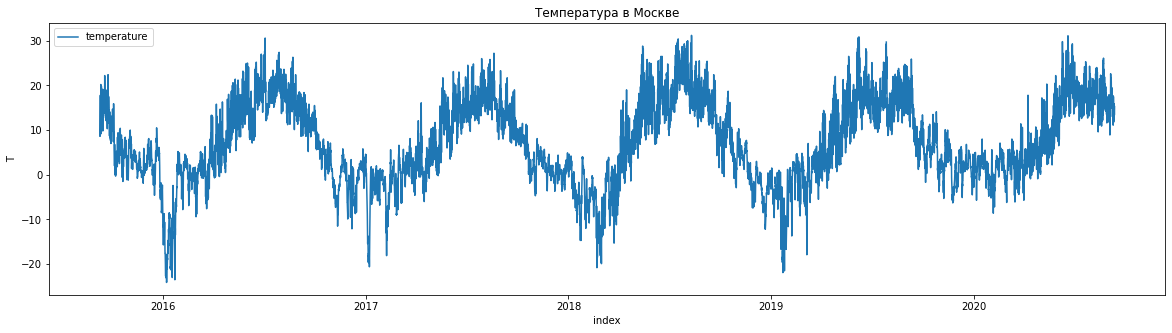

In [79]:
x = data['date2']
y = data['T']

plt.figure(figsize=(20, 5))
plt.plot(x, y, label='temperature')
plt.title('Температура в Москве')
plt.xlabel('index')
plt.ylabel('T')
plt.legend()

In [80]:
# Фильтрация по условию
day_first = pd.Timestamp(day=1, month=2, year=2017)
condition = (data['date2'] > day_first)
data[condition]

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,date2
4075,01.02.2017 03:00,-1.4,765.2,765.8,0.1,82.0,"Ветер, дующий с запада",2.0,NaN,NaN,100%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,300-600,NaN,NaN,10.0,-4.1,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-02 03:00:00,2017-02-01 03:00:00
4076,01.02.2017 06:00,-1.9,765.2,765.8,0.0,87.0,"Ветер, дующий с запада",2.0,NaN,NaN,100%.,,NaN,NaN,-1.9,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,200-300,NaN,NaN,10.0,-3.8,0.3,12.0,NaN,NaN,NaN,NaN,2017-01-02 06:00:00,2017-02-01 06:00:00
4077,01.02.2017 09:00,-2.3,765.4,766.0,0.2,93.0,"Ветер, дующий с запада",3.0,NaN,NaN,100%.,,NaN,NaN,-2.3,NaN,Слоистые туманообразные или слоистые разорванн...,100%.,200-300,NaN,NaN,10.0,-3.3,Следы осадков,12.0,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,3,2017-01-02 09:00:00,2017-02-01 09:00:00
4078,01.02.2017 12:00,-2.0,765.7,766.3,0.3,86.0,"Ветер, дующий с западо-северо-запада",4.0,NaN,NaN,100%.,Снег непрерывный слабый в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,300-600,NaN,NaN,4.0,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-02 12:00:00,2017-02-01 12:00:00
4079,01.02.2017 15:00,-1.9,766.3,766.9,0.6,86.0,"Ветер, дующий с западо-северо-запада",2.0,NaN,NaN,100%.,Снег неливневый.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,300-600,NaN,NaN,10.0,-3.9,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-02 15:00:00,2017-02-01 15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14607,10.09.2020 00:00,13.8,750.4,750.7,-3.0,84.0,"Ветер, дующий с юга",3.0,NaN,NaN,"90 или более, но не 100%",Состояние неба в общем не изменилось.,Дождь.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",20–30%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,11.1,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-09 00:00:00,2020-09-10 00:00:00
14608,10.09.2020 03:00,13.6,746.3,746.7,-4.1,95.0,"Ветер, дующий с юга",3.0,NaN,NaN,100%.,Ливневый(ые) дождь(и).,Ливень (ливни).,Дождь.,NaN,NaN,"Кучево-дождевые лысые с кучевыми, слоисто-куче...",100%.,300-600,NaN,NaN,10.0,12.8,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-09 03:00:00,2020-09-10 03:00:00
14609,10.09.2020 06:00,14.8,743.8,744.1,-2.5,89.0,"Ветер, дующий с юго-юго-запада",3.0,NaN,NaN,60%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,13.0,NaN,Кучевые и слоисто-кучевые (но не слоисто-кучев...,50%.,1000-1500,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,13.0,6,12.0,NaN,NaN,NaN,NaN,2020-10-09 06:00:00,2020-09-10 06:00:00
14610,10.09.2020 09:00,15.4,742.3,742.6,-1.5,76.0,"Ветер, дующий с юго-запада",6.0,12.0,13.0,"90 или более, но не 100%",Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,13.0,NaN,"Слоисто-кучевые, образовавшиеся из кучевых.",60%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,11.1,6,12.0,Поверхность почвы влажная.,12.0,NaN,NaN,2020-10-09 09:00:00,2020-09-10 09:00:00


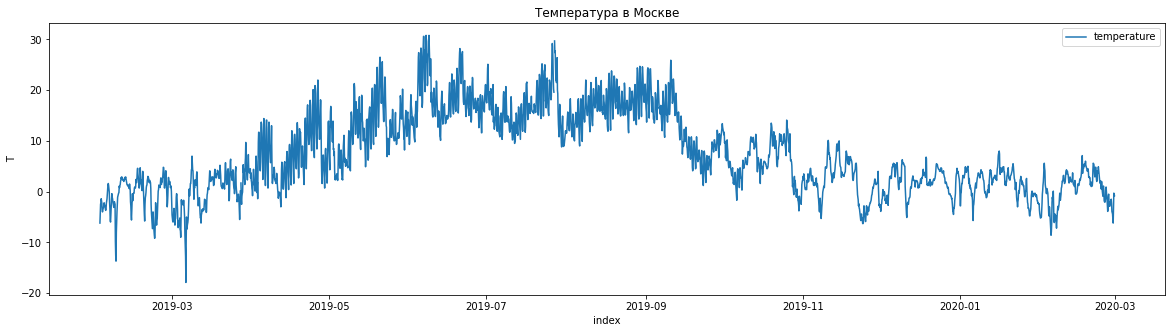

In [31]:
# Фильтрация по условию
data_small = data[condition]

x = data_small['date2']
y = data_small['T']

plt.figure(figsize=(20, 5))
plt.plot(x, y, label='temperature')
plt.title('Температура в СПб')
plt.xlabel('index')
plt.ylabel('T')
plt.legend()

In [81]:
# Для самопроверки упражнение:
# вывести на график данные с 1 декабря 2016 по 1 января 2018 года
first_day = pd.Timestamp(year=2016, month=12, day=1)
last_day = pd.Timestamp(year=2018, month=1, day=31)


In [ ]:
#   1 СПОСОБ

In [82]:

data2 = data[data['date'] > first_day]
data3 = data2[data2['date'] < last_day]

data3


,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,date2
990,12.01.2016 03:00,-11.2,755.9,756.5,-2.0,74.0,"Ветер, дующий с востока",2.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...",NaN,10.0,-14.9,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01 03:00:00,2016-01-12 03:00:00
991,12.01.2016 06:00,-10.4,753.8,754.4,-2.1,75.0,"Ветер, дующий с востока",3.0,NaN,NaN,100%.,,NaN,NaN,-12.9,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...",NaN,10.0,-14.1,Осадков нет,12.0,NaN,NaN,NaN,NaN,2016-12-01 06:00:00,2016-01-12 06:00:00
992,12.01.2016 09:00,-9.7,751.1,751.7,-2.7,93.0,"Ветер, дующий с востока",2.0,NaN,NaN,100%.,Снег непрерывный умеренный в срок наблюдения.,Ливень (ливни).,Снег или дождь со снегом.,-12.9,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,0.5,-10.7,3,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,4,2016-12-01 09:00:00,2016-01-12 09:00:00
993,12.01.2016 12:00,-9.1,749.2,749.8,-1.9,93.0,"Ветер, дующий с востоко-северо-востока",2.0,NaN,NaN,100%.,Снег непрерывный умеренный в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,10.0,-10.1,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01 12:00:00,2016-01-12 12:00:00
994,12.01.2016 15:00,-8.8,746.8,747.4,-2.4,92.0,"Ветер, дующий с востоко-северо-востока",2.0,NaN,NaN,100%.,Снег непрерывный умеренный в срок наблюдения.,Снег или дождь со снегом.,Песчаная или пыльная буря или снежная низовая ...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,2.0,-9.9,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01 15:00:00,2016-01-12 15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,01.12.2018 09:00,-7.1,771.8,772.4,-0.1,40.0,"Ветер, дующий с юга",2.0,NaN,NaN,Облаков нет.,,NaN,NaN,-7.2,NaN,NaN,NaN,NaN,NaN,NaN,10.0,-18.4,Осадков нет,12.0,NaN,NaN,NaN,NaN,2018-01-12 09:00:00,2018-12-01 09:00:00
9422,01.12.2018 12:00,-7.1,771.9,772.5,0.1,43.0,"Ветер, дующий с юга",2.0,NaN,NaN,60%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-17.6,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 12:00:00,2018-12-01 12:00:00
9423,01.12.2018 15:00,-5.2,770.3,770.9,-1.6,37.0,"Ветер, дующий с востоко-юго-востока",2.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, полосами, либо о...",NaN,10.0,-17.8,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 15:00:00,2018-12-01 15:00:00
9424,01.12.2018 18:00,-4.2,768.7,769.3,-1.6,39.0,"Ветер, дующий с востока",1.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, полосами, либо о...",NaN,10.0,-16.3,Осадков нет,12.0,NaN,NaN,NaN,NaN,2018-01-12 18:00:00,2018-12-01 18:00:00


In [ ]:
#   2-Й СПОСОБ  - ПРЕДПОЧТИТЕЛЬНЫЙ !

In [83]:
data4 = data[(data['date'] > first_day) & (data['date'] < last_day)]
data4


,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,date2
990,12.01.2016 03:00,-11.2,755.9,756.5,-2.0,74.0,"Ветер, дующий с востока",2.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...",NaN,10.0,-14.9,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01 03:00:00,2016-01-12 03:00:00
991,12.01.2016 06:00,-10.4,753.8,754.4,-2.1,75.0,"Ветер, дующий с востока",3.0,NaN,NaN,100%.,,NaN,NaN,-12.9,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...",NaN,10.0,-14.1,Осадков нет,12.0,NaN,NaN,NaN,NaN,2016-12-01 06:00:00,2016-01-12 06:00:00
992,12.01.2016 09:00,-9.7,751.1,751.7,-2.7,93.0,"Ветер, дующий с востока",2.0,NaN,NaN,100%.,Снег непрерывный умеренный в срок наблюдения.,Ливень (ливни).,Снег или дождь со снегом.,-12.9,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,0.5,-10.7,3,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,4,2016-12-01 09:00:00,2016-01-12 09:00:00
993,12.01.2016 12:00,-9.1,749.2,749.8,-1.9,93.0,"Ветер, дующий с востоко-северо-востока",2.0,NaN,NaN,100%.,Снег непрерывный умеренный в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,10.0,-10.1,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01 12:00:00,2016-01-12 12:00:00
994,12.01.2016 15:00,-8.8,746.8,747.4,-2.4,92.0,"Ветер, дующий с востоко-северо-востока",2.0,NaN,NaN,100%.,Снег непрерывный умеренный в срок наблюдения.,Снег или дождь со снегом.,Песчаная или пыльная буря или снежная низовая ...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,2.0,-9.9,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01 15:00:00,2016-01-12 15:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,01.12.2018 09:00,-7.1,771.8,772.4,-0.1,40.0,"Ветер, дующий с юга",2.0,NaN,NaN,Облаков нет.,,NaN,NaN,-7.2,NaN,NaN,NaN,NaN,NaN,NaN,10.0,-18.4,Осадков нет,12.0,NaN,NaN,NaN,NaN,2018-01-12 09:00:00,2018-12-01 09:00:00
9422,01.12.2018 12:00,-7.1,771.9,772.5,0.1,43.0,"Ветер, дующий с юга",2.0,NaN,NaN,60%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-17.6,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 12:00:00,2018-12-01 12:00:00
9423,01.12.2018 15:00,-5.2,770.3,770.9,-1.6,37.0,"Ветер, дующий с востоко-юго-востока",2.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, полосами, либо о...",NaN,10.0,-17.8,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 15:00:00,2018-12-01 15:00:00
9424,01.12.2018 18:00,-4.2,768.7,769.3,-1.6,39.0,"Ветер, дующий с востока",1.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, полосами, либо о...",NaN,10.0,-16.3,Осадков нет,12.0,NaN,NaN,NaN,NaN,2018-01-12 18:00:00,2018-12-01 18:00:00


In [ ]:
#   3-Й СПОСОБ

In [84]:
data5 = data[data['date'].between(first_day, last_day)]
data5

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,date2
989,12.01.2016 00:00,-12.0,757.9,758.5,-2.0,74.0,"Ветер, дующий с востока",2.0,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",70 – 80%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,-15.8,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,2016-01-12 00:00:00
990,12.01.2016 03:00,-11.2,755.9,756.5,-2.0,74.0,"Ветер, дующий с востока",2.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...",NaN,10.0,-14.9,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01 03:00:00,2016-01-12 03:00:00
991,12.01.2016 06:00,-10.4,753.8,754.4,-2.1,75.0,"Ветер, дующий с востока",3.0,NaN,NaN,100%.,,NaN,NaN,-12.9,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.","Высококучевые, просвечивающие или плотные в дв...",NaN,10.0,-14.1,Осадков нет,12.0,NaN,NaN,NaN,NaN,2016-12-01 06:00:00,2016-01-12 06:00:00
992,12.01.2016 09:00,-9.7,751.1,751.7,-2.7,93.0,"Ветер, дующий с востока",2.0,NaN,NaN,100%.,Снег непрерывный умеренный в срок наблюдения.,Ливень (ливни).,Снег или дождь со снегом.,-12.9,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,0.5,-10.7,3,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,4,2016-12-01 09:00:00,2016-01-12 09:00:00
993,12.01.2016 12:00,-9.1,749.2,749.8,-1.9,93.0,"Ветер, дующий с востоко-северо-востока",2.0,NaN,NaN,100%.,Снег непрерывный умеренный в срок наблюдения.,Снег или дождь со снегом.,Облака покрывали более половины неба в течение...,NaN,NaN,Слоистые разорванные или кучевые разорванные о...,100%.,300-600,Высокослоистые непросвечивающие или слоисто-до...,NaN,10.0,-10.1,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01 12:00:00,2016-01-12 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9421,01.12.2018 09:00,-7.1,771.8,772.4,-0.1,40.0,"Ветер, дующий с юга",2.0,NaN,NaN,Облаков нет.,,NaN,NaN,-7.2,NaN,NaN,NaN,NaN,NaN,NaN,10.0,-18.4,Осадков нет,12.0,NaN,NaN,NaN,NaN,2018-01-12 09:00:00,2018-12-01 09:00:00
9422,01.12.2018 12:00,-7.1,771.9,772.5,0.1,43.0,"Ветер, дующий с юга",2.0,NaN,NaN,60%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,-17.6,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 12:00:00,2018-12-01 12:00:00
9423,01.12.2018 15:00,-5.2,770.3,770.9,-1.6,37.0,"Ветер, дующий с востоко-юго-востока",2.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, полосами, либо о...",NaN,10.0,-17.8,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-12 15:00:00,2018-12-01 15:00:00
9424,01.12.2018 18:00,-4.2,768.7,769.3,-1.6,39.0,"Ветер, дующий с востока",1.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, полосами, либо о...",NaN,10.0,-16.3,Осадков нет,12.0,NaN,NaN,NaN,NaN,2018-01-12 18:00:00,2018-12-01 18:00:00


In [85]:
# 2 беды:
# данные задом наперед - сначала 2015, потом 2020
# по умолчанию pandas пытается считать американский формат

# Фиксим российский формат дат на американский
data['date'] = pd.to_datetime(data['Местное время в Санкт-Петербурге'], dayfirst=True)

# Отсортировали данные по дате в правильном порядке
data = data.sort_values('date')
data

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,date2
0,10.09.2015 00:00,10.0,768.7,769.3,0.6,83.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перисто-слоистые, покрывающие все небо.",10.0,7.3,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-10 00:00:00,2015-09-10 00:00:00
1,10.09.2015 03:00,8.6,769.2,769.8,0.5,90.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",Облаков нет.,"2500 или более, или облаков нет.","Высококучевых, высокослоистых или слоисто-дожд...","Перисто-слоистые, покрывающие все небо.",10.0,7.1,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-10 03:00:00,2015-09-10 03:00:00
2,10.09.2015 06:00,9.6,769.7,770.3,0.5,87.0,"Штиль, безветрие",0.0,NaN,NaN,100%.,,NaN,NaN,8.1,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",100%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, полосами, либо о...",NaN,10.0,7.5,Осадков нет,12.0,NaN,NaN,NaN,NaN,2015-09-10 06:00:00,2015-09-10 06:00:00
3,10.09.2015 09:00,12.7,770.0,770.6,0.3,87.0,"Ветер, дующий с запада",1.0,NaN,NaN,"90 или более, но не 100%",,NaN,NaN,8.1,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...","90 или более, но не 100%","2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,10.6,Осадков нет,12.0,NaN,NaN,NaN,NaN,2015-09-10 09:00:00,2015-09-10 09:00:00
4,10.09.2015 12:00,15.9,770.5,771.1,0.5,73.0,"Ветер, дующий с западо-юго-запада",2.0,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",70 – 80%.,"2500 или более, или облаков нет.",Клочья (часто чечевицеобразные) высококучевых ...,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,11.1,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-10 12:00:00,2015-09-10 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14607,10.09.2020 00:00,13.8,750.4,750.7,-3.0,84.0,"Ветер, дующий с юга",3.0,NaN,NaN,"90 или более, но не 100%",Состояние неба в общем не изменилось.,Дождь.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",20–30%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,11.1,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-10 00:00:00,2020-09-10 00:00:00
14608,10.09.2020 03:00,13.6,746.3,746.7,-4.1,95.0,"Ветер, дующий с юга",3.0,NaN,NaN,100%.,Ливневый(ые) дождь(и).,Ливень (ливни).,Дождь.,NaN,NaN,"Кучево-дождевые лысые с кучевыми, слоисто-куче...",100%.,300-600,NaN,NaN,10.0,12.8,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-10 03:00:00,2020-09-10 03:00:00
14609,10.09.2020 06:00,14.8,743.8,744.1,-2.5,89.0,"Ветер, дующий с юго-юго-запада",3.0,NaN,NaN,60%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,13.0,NaN,Кучевые и слоисто-кучевые (но не слоисто-кучев...,50%.,1000-1500,"Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",10.0,13.0,6,12.0,NaN,NaN,NaN,NaN,2020-09-10 06:00:00,2020-09-10 06:00:00
14610,10.09.2020 09:00,15.4,742.3,742.6,-1.5,76.0,"Ветер, дующий с юго-запада",6.0,12.0,13.0,"90 или более, но не 100%",Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,13.0,NaN,"Слоисто-кучевые, образовавшиеся из кучевых.",60%.,600-1000,"Высококучевые просвечивающие, расположенные на...","Перисто-кучевые одни или перисто-кучевые, сопр...",10.0,11.1,6,12.0,Поверхность почвы влажная.,12.0,NaN,NaN,2020-09-10 09:00:00,2020-09-10 09:00:00


In [86]:
data['T'].min()

-24.1

In [87]:
data['T'].max()

31.2

In [89]:
data['min_T'] = data['T'].min()
data['max_T'] = data['T'].max()

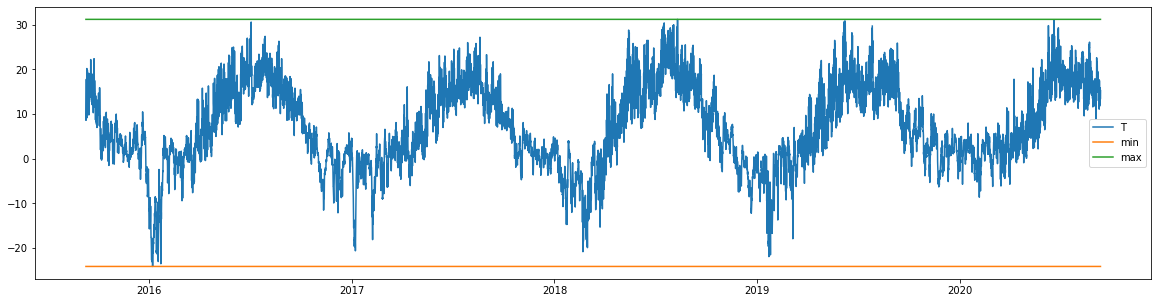

In [90]:
x = data['date']
y = data['T']
plt.figure(figsize=(20, 5))
plt.plot(x, y, label='T')
plt.plot(x, data['min_T'], label='min')
plt.plot(x, data['max_T'], label='max')
plt.legend()

In [ ]:
# 95% квантиль равен 23.3 градусов = в 95% случаев температура не превышает 25 градусов


In [91]:
data['T'].quantile(0.95)

21.5

In [40]:
data['T'].quantile(0.05)

-6.9

In [93]:
data['quantile_95'] = data['T'].quantile(0.95)
data['quantile_05'] = data['T'].quantile(0.05)

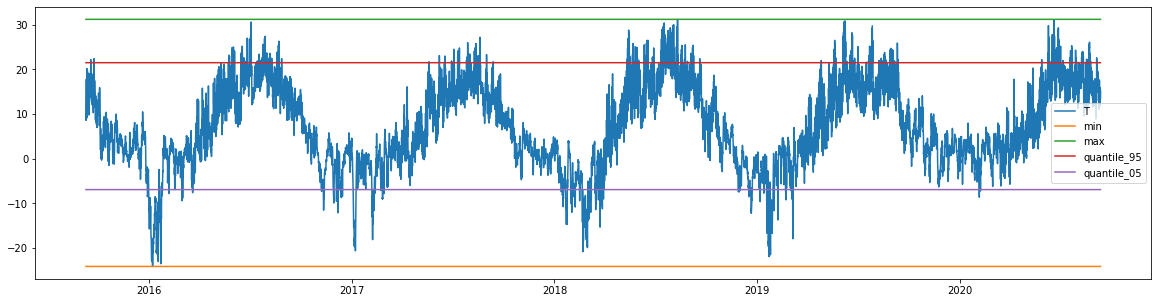

In [94]:
x = data['date']
y = data['T']
plt.figure(figsize=(20, 5))
plt.plot(x, y, label='T')
plt.plot(x, data['min_T'], label='min')
plt.plot(x, data['max_T'], label='max')
plt.plot(x, data['quantile_95'], label='quantile_95')
plt.plot(x, data['quantile_05'], label='quantile_05')
plt.legend()

In [ ]:
# Скользящее среднее - позволяет следить за динамикой процесса путем сглаживания

In [95]:
data['T'].rolling(10).mean()

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
14607    13.89
14608    13.87
14609    14.07
14610    14.43
14611    14.60
Name: T, Length: 14612, dtype: float64

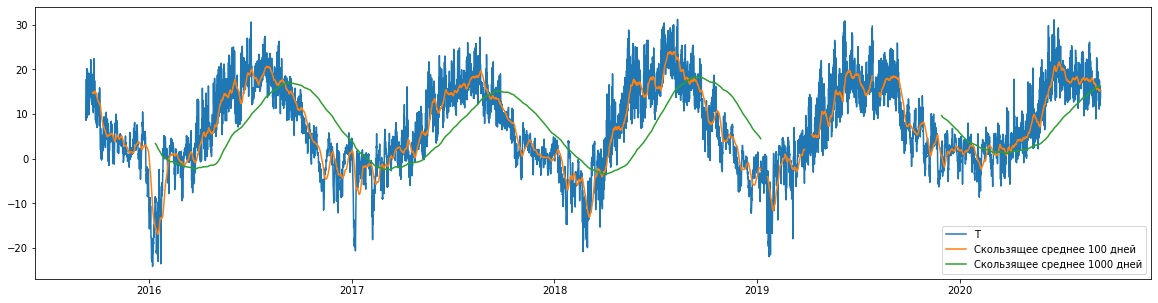

In [100]:
x = data['date']
y = data['T']
plt.figure(figsize=(20, 5))
plt.plot(x, y, label='T')
plt.plot(x, data['T'].rolling(100).mean(), label='Скользящее среднее 100 дней')
plt.plot(x, data['T'].rolling(1000).mean(), label='Скользящее среднее 1000 дней')
plt.legend()

In [ ]:
# Гистограмма - функция, которая показывает частоту, с которой встречаются различные значения

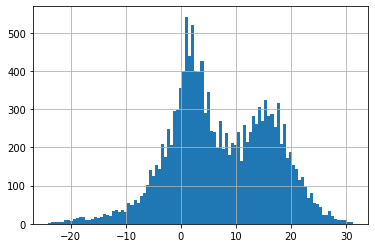

In [46]:
data['T'].hist(bins=100)

In [ ]:
# Корреляция - значение, которое показывает, насколько 2 ряда "похожи" друг на друга

In [47]:
data.corr()
# Научная запись, 1.03e-15 = 1.03 * (10 в минус 15 степени)
# 1.000000e+00 = 1 * (10 в степени 0) = 1

,T,Po,P,Pa,U,Ff,ff10,ff3,Tn,Tx,VV,Td,tR,Tg,min_T,max_T,quantile_95,quantile_05
T,1.000000e+00,1.568232e-02,1.268533e-02,-7.474429e-02,-4.183315e-01,-4.256811e-02,1.121001e-01,4.401833e-02,9.786892e-01,9.815848e-01,1.532930e-01,8.918044e-01,-1.067471e-02,8.285202e-01,4.779707e-15,8.206676e-15,NaN,2.574485e-15
Po,1.568232e-02,1.000000e+00,9.998812e-01,6.006214e-02,-2.132482e-01,-3.077766e-01,-1.893467e-01,-2.162713e-01,-3.343641e-02,3.607375e-02,1.612338e-01,-8.577709e-02,2.260465e-03,-1.019188e-01,-5.164894e-13,-5.136499e-13,NaN,-5.169050e-13
P,1.268533e-02,9.998812e-01,1.000000e+00,5.903002e-02,-2.116266e-01,-3.076897e-01,-1.928457e-01,-2.158245e-01,-3.597188e-02,3.298219e-02,1.605112e-01,-8.834635e-02,2.332270e-03,-1.061328e-01,-5.031583e-13,-5.047987e-13,NaN,-5.016429e-13
Pa,-7.474429e-02,6.006214e-02,5.903002e-02,1.000000e+00,4.739442e-02,-6.649523e-02,3.252668e-02,1.022192e-01,-8.845826e-03,-2.977515e-02,8.961376e-02,-4.827375e-02,4.363314e-03,-5.483361e-02,-1.682076e-16,2.581880e-16,NaN,5.777539e-18
U,-4.183315e-01,-2.132482e-01,-2.116266e-01,4.739442e-02,1.000000e+00,-6.672796e-02,4.937159e-02,2.619348e-02,-1.543762e-01,-4.545390e-01,-3.223553e-01,2.871034e-02,-9.606769e-03,1.661849e-01,-7.607978e-15,3.140804e-14,NaN,-1.721156e-14
Ff,-4.256811e-02,-3.077766e-01,-3.076897e-01,-6.649523e-02,-6.672796e-02,1.000000e+00,4.591886e-01,3.633521e-01,-7.663009e-02,-1.787251e-01,-4.250099e-02,-7.223855e-02,8.877598e-03,-1.299893e-02,6.650237e-15,2.285520e-15,NaN,-4.209725e-15
ff10,1.121001e-01,-1.893467e-01,-1.928457e-01,3.252668e-02,4.937159e-02,4.591886e-01,1.000000e+00,5.746504e-01,-4.592410e-02,2.152572e-01,-7.552553e-02,1.511999e-01,NaN,3.255584e-01,-3.403645e-16,-4.117765e-16,NaN,5.182404e-16
ff3,4.401833e-02,-2.162713e-01,-2.158245e-01,1.022192e-01,2.619348e-02,3.633521e-01,5.746504e-01,1.000000e+00,-5.070920e-02,2.430817e-01,-8.591534e-02,6.905629e-02,NaN,-9.673503e-02,1.019363e-15,-1.918324e-16,NaN,-2.315713e-16
Tn,9.786892e-01,-3.343641e-02,-3.597188e-02,-8.845826e-03,-1.543762e-01,-7.663009e-02,-4.592410e-02,-5.070920e-02,1.000000e+00,NaN,9.586011e-02,9.588507e-01,-2.011278e-02,9.564940e-01,2.936101e-15,-1.275854e-15,NaN,-1.654861e-16
Tx,9.815848e-01,3.607375e-02,3.298219e-02,-2.977515e-02,-4.545390e-01,-1.787251e-01,2.152572e-01,2.430817e-01,NaN,1.000000e+00,1.729012e-01,8.633420e-01,NaN,NaN,4.361823e-16,-8.037708e-16,NaN,7.723893e-16


In [101]:
# corr(X, X) = autocorr(X)

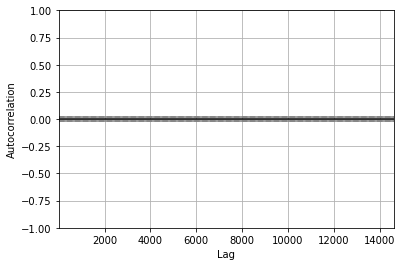

In [102]:
pd.plotting.autocorrelation_plot(data['T'])

In [103]:
data['T']

0        10.0
1         8.6
2         9.6
3        12.7
4        15.9
         ... 
14607    13.8
14608    13.6
14609    14.8
14610    15.4
14611    13.5
Name: T, Length: 14612, dtype: float64

In [52]:
# У нас есть несколько измерений, из-за этого колебания дневные + сезонные. Удалим дневные
data_daily = data[data['date'].dt.hour == 12]
data_daily

,Местное время в Санкт-Петербурге,T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date,date2,min_T,max_T,quantile_95,quantile_05
4,10.09.2015 12:00,15.9,770.5,771.1,0.5,73.0,"Ветер, дующий с западо-юго-запада",2.0,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",70 – 80%.,"2500 или более, или облаков нет.",Клочья (часто чечевицеобразные) высококучевых ...,"Перистых, перисто-кучевых или перисто-слоистых...",10.0,11.1,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-10 12:00:00,2015-09-10 12:00:00,-24.1,31.2,21.5,-6.9
12,11.09.2015 12:00,19.0,777.7,778.3,0.5,53.0,"Ветер, дующий с востока",1.0,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.1,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-11 12:00:00,2015-09-11 12:00:00,-24.1,31.2,21.5,-6.9
20,12.09.2015 12:00,17.9,778.0,778.6,-0.2,46.0,"Ветер, дующий с западо-юго-запада",2.0,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,6.2,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-12 12:00:00,2015-09-12 12:00:00,-24.1,31.2,21.5,-6.9
28,13.09.2015 12:00,19.2,774.0,774.5,-0.4,54.0,"Штиль, безветрие",0.0,NaN,NaN,Облаков нет.,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,9.6,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-13 12:00:00,2015-09-13 12:00:00,-24.1,31.2,21.5,-6.9
36,14.09.2015 12:00,17.0,771.4,771.9,-0.6,61.0,"Ветер, дующий с юга",2.0,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевых, слоистых, кучевых или кучево-...",50%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,9.4,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-14 12:00:00,2015-09-14 12:00:00,-24.1,31.2,21.5,-6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14579,06.09.2020 12:00,15.2,757.7,758.1,0.8,87.0,"Ветер, дующий с западо-юго-запада",1.0,NaN,NaN,100%.,Состояние неба в общем не изменилось.,Дождь.,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",100%.,600-1000,NaN,NaN,10.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-06 12:00:00,2020-09-06 12:00:00,-24.1,31.2,21.5,-6.9
14587,07.09.2020 12:00,17.7,761.6,762.0,0.6,60.0,"Ветер, дующий с юго-запада",3.0,NaN,NaN,60%.,,NaN,NaN,NaN,NaN,Кучевые средние или мощные или вместе с кучевы...,"10% или менее, но не 0",1000-1500,"Высококучевых, высокослоистых или слоисто-дожд...",Перистые когтевидные или нитевидные или первые...,10.0,9.7,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-07 12:00:00,2020-09-07 12:00:00,-24.1,31.2,21.5,-6.9
14595,08.09.2020 12:00,15.4,758.2,758.5,-0.8,79.0,"Ветер, дующий с запада",2.0,NaN,NaN,70 – 80%.,,NaN,NaN,NaN,NaN,"Слоисто-кучевые, образовавшиеся не из кучевых.",40%.,300-600,"Высококучевые, просвечивающие или плотные в дв...","Перистые нитевидные, иногда когтевидные, не ра...",10.0,11.7,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-08 12:00:00,2020-09-08 12:00:00,-24.1,31.2,21.5,-6.9
14603,09.09.2020 12:00,15.6,755.7,756.1,1.1,74.0,"Ветер, дующий с запада",2.0,NaN,NaN,60%.,,NaN,NaN,NaN,NaN,NaN,NaN,600-1000,NaN,NaN,10.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-09 12:00:00,2020-09-09 12:00:00,-24.1,31.2,21.5,-6.9


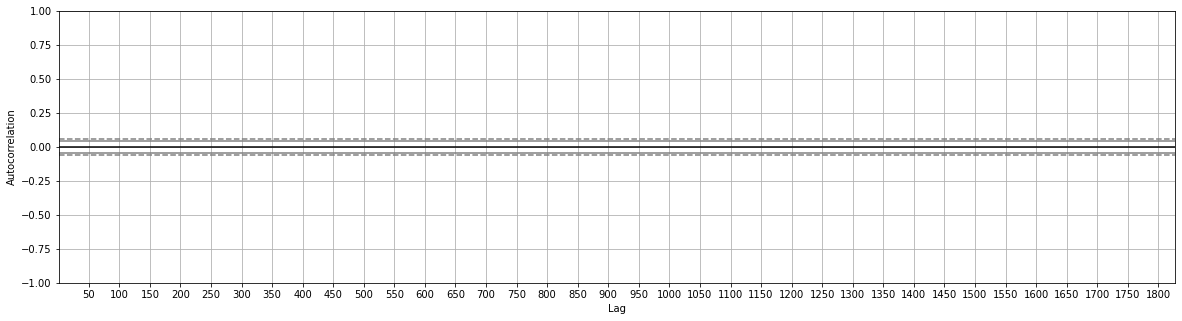

In [104]:
plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(data_daily['T'])
plt.locator_params(axis='x', nbins=50)

In [ ]:
# Построение тренда

In [109]:
from sklearn.linear_model import LinearRegression

In [115]:
# Создаем объект линейного регрессора
model = LinearRegression()
# Обучаем модель на точках
X = pd.DataFrame(data.index)  # преобразовали индекс в таблицу
X
model.fit(X, data['T'])  # Обучаемся на исходных данных

##LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

ValueError: ignored